# Aula Introdutória
Importando arquivo para Análise


In [27]:
import pandas as pd
import numpy as np
import plotly.express as px

### Planilha Principal

In [2]:
df_principal = pd.read_excel('/content/drive/MyDrive/Alura/Tabela de ações.xlsx',sheet_name='Principal', )
df_principal.head()

,Ativo,Data,Último (R$),Var. Dia (%),Var. Sem. (%),Var. Mês (%),Var. Ano (%),Var. 12M (%),Val. Mín,Val. Máx,Volume
0,USIM5,2024-01-26,9.50,5.20,11.76,2.26,2.26,15.97,9.18,9.56,"319,16 M"
1,CMIN3,2024-01-26,6.82,2.40,2.40,-12.11,-12.11,50.56,6.66,6.86,"32,65 M"
2,PETR3,2024-01-26,41.96,2.19,7.73,7.64,7.64,77.55,40.81,42.34,"436,69 M"
3,SUZB3,2024-01-26,52.91,2.04,2.14,-4.89,-4.89,18.85,51.89,53.17,"162,55 M"
4,CPFE3,2024-01-26,37.10,2.03,2.49,-3.66,-3.66,20.70,36.37,37.32,"73,42 M"


### Planilha 2 - Total de Ações

In [3]:
df_total_acoes = pd.read_excel('/content/drive/MyDrive/Alura/Tabela de ações.xlsx',sheet_name='Total_de_acoes')
df_total_acoes.head()

,Código,Qtde. Teórica
0,RRRP3,2.356656e+08
1,ALOS3,5.326166e+08
2,ALPA4,1.767340e+08
3,ABEV3,4.394246e+09
4,ARZZ3,6.230589e+07


### Planilha 3 - Tickers


In [4]:
df_ticker = pd.read_excel('/content/drive/MyDrive/Alura/Tabela de ações.xlsx',sheet_name='Ticker')
df_ticker.head()

,Ticker,Nome
0,MGLU3,Magazine Luiza
1,HAPV3,Hapvida
2,PETR4,Petrobras
3,B3SA3,B3
4,USIM5,Usiminas


### Planilha 4 - CHATGPT


In [5]:
df_chatgpt = pd.read_excel('/content/drive/MyDrive/Alura/Tabela de ações.xlsx',sheet_name='ChatGPT')
df_chatgpt.head()

,Nome da empresa,Segmento,Idade (anos)
0,Usiminas,Siderurgia,60
1,CSN Mineração,Mineração,8
2,Petrobras,Petróleo,69
3,Suzano,Papel e Celulose,94
4,CPFL Energia,Energia,109


### Capturando dados das 4 Primeiras Colunas

In [6]:
df_principal= df_principal[['Ativo','Data','Último (R$)','Var. Dia (%)']].copy()
df_principal

,Ativo,Data,Último (R$),Var. Dia (%)
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


### Renomeando Colunas

In [7]:
df_principal = df_principal.rename(columns={'Último (R$)':'Valor_final','Var. Dia (%)':'Var_dia_pct'}).copy()
df_principal

,Ativo,Data,Valor_final,Var_dia_pct
0,USIM5,2024-01-26,9.50,5.20
1,CMIN3,2024-01-26,6.82,2.40
2,PETR3,2024-01-26,41.96,2.19
3,SUZB3,2024-01-26,52.91,2.04
4,CPFE3,2024-01-26,37.10,2.03
...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45
77,BHIA3,2024-01-26,8.70,-2.46
78,RENT3,2024-01-26,56.24,-3.63
79,CVCB3,2024-01-26,3.07,-4.36


### Criando Novas Colunas

In [8]:
df_principal['Var_pct'] = df_principal['Var_dia_pct'] / 100
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct
0,USIM5,2024-01-26,9.50,5.20,0.0520
1,CMIN3,2024-01-26,6.82,2.40,0.0240
2,PETR3,2024-01-26,41.96,2.19,0.0219
3,SUZB3,2024-01-26,52.91,2.04,0.0204
4,CPFE3,2024-01-26,37.10,2.03,0.0203
...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246
78,RENT3,2024-01-26,56.24,-3.63,-0.0363
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436


In [9]:
df_principal['Valor_inicial'] = df_principal['Valor_final'] / (df_principal['Var_pct'] + 1)
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854
...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954


### Juntar duas Planilhas

In [10]:
df_principal = df_principal.merge(df_total_acoes, left_on='Ativo', right_on='Código', how ='left')
df_principal


,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Código,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,USIM5,5.151174e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,CMIN3,1.110559e+09
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,PETR3,2.379878e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,SUZB3,6.834528e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,CPFE3,1.877325e+08
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,CRFB3,5.339906e+08
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,BHIA3,9.484305e+07
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,RENT3,8.532023e+08
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,CVCB3,5.255828e+08


### Removendo Colunas

In [11]:
df_principal = df_principal.drop(columns=['Código'])
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08
...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08


In [12]:
df_principal['Variacao_rs'] = (df_principal['Valor_final'] - df_principal['Valor_inicial']) * (df_principal['Qtde. Teórica'])
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica,Variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.0520,9.030418,5.151174e+08,2.418897e+08
1,CMIN3,2024-01-26,6.82,2.40,0.0240,6.660156,1.110559e+09,1.775160e+08
2,PETR3,2024-01-26,41.96,2.19,0.0219,41.060769,2.379878e+09,2.140059e+09
3,SUZB3,2024-01-26,52.91,2.04,0.0204,51.852215,6.834528e+08,7.229463e+08
4,CPFE3,2024-01-26,37.10,2.03,0.0203,36.361854,1.877325e+08,1.385740e+08
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.0245,10.978985,5.339906e+08,-1.436355e+08
77,BHIA3,2024-01-26,8.70,-2.46,-0.0246,8.919418,9.484305e+07,-2.081024e+07
78,RENT3,2024-01-26,56.24,-3.63,-0.0363,58.358410,8.532023e+08,-1.807433e+09
79,CVCB3,2024-01-26,3.07,-4.36,-0.0436,3.209954,5.255828e+08,-7.355741e+07


In [13]:
pd.options.display.float_format='{:.2f}'.format
df_principal['Qtde. Teórica']=df_principal['Qtde. Teórica'].astype(int)
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtde. Teórica,Variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06


In [14]:
df_principal = df_principal.rename(columns={'Qtde. Teórica':'Qtd_teorica'}).copy()
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06
...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06


In [15]:
df_principal['Resultado'] = df_principal['Variacao_rs'].apply(lambda x: "SUBIU" if x > 0 else ("DESCEU" if x < 0 else "MANTEVE-SE"))
df_principal


,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,SUBIU
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,SUBIU
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,SUBIU
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,SUBIU
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,SUBIU
...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,DESCEU
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,DESCEU
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,DESCEU
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,DESCEU


Agrupando mais uma planilha

In [16]:
df_principal = df_principal.merge(df_ticker, left_on='Ativo', right_on='Ticker', how ='left')

df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Ticker,Nome
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,SUBIU,USIM5,Usiminas
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,SUBIU,CMIN3,CSN Mineração
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,SUBIU,PETR3,Petrobras
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,SUBIU,SUZB3,Suzano
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,SUBIU,CPFE3,CPFL Energia
...,...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,DESCEU,CRFB3,Carrefour Brasil
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,DESCEU,BHIA3,Casas Bahia
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,DESCEU,RENT3,Localiza
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,DESCEU,CVCB3,CVC


In [17]:
df_principal = df_principal.drop(columns=['Ticker'])
df_principal = df_principal.rename(columns={'Nome':'Empresa'}).copy()
df_principal


,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Empresa
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,SUBIU,Usiminas
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,SUBIU,CSN Mineração
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,SUBIU,Petrobras
3,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,SUBIU,Suzano
4,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,SUBIU,CPFL Energia
...,...,...,...,...,...,...,...,...,...,...
76,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,DESCEU,Carrefour Brasil
77,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,DESCEU,Casas Bahia
78,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,DESCEU,Localiza
79,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,DESCEU,CVC


### Agrupando a planilha CHATGPT

In [18]:
df_principal = df_principal.merge(df_chatgpt , left_on='Empresa', right_on='Nome da empresa', how ='left')
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Empresa,Nome da empresa,Segmento,Idade (anos)
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,SUBIU,Usiminas,Usiminas,Siderurgia,60
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,SUBIU,CSN Mineração,CSN Mineração,Mineração,8
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,SUBIU,Petrobras,Petrobras,Petróleo,69
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,SUBIU,Petrobras,Petrobras,Petróleo,69
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,SUBIU,Suzano,Suzano,Papel e Celulose,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,DESCEU,Carrefour Brasil,Carrefour Brasil,Varejo,37
83,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,DESCEU,Casas Bahia,Casas Bahia,Varejo,95
84,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,DESCEU,Localiza,Localiza,Aluguel de Carros,49
85,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,DESCEU,CVC,CVC,Turismo,50


In [19]:
df_principal = df_principal.drop(columns=['Nome da empresa'])
df_principal = df_principal.rename(columns={'Idade (anos)':'Anos_de_fundacao'}).copy()
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Empresa,Segmento,Anos_de_fundacao
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,SUBIU,Usiminas,Siderurgia,60
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,SUBIU,CSN Mineração,Mineração,8
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,SUBIU,Petrobras,Petróleo,69
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,SUBIU,Petrobras,Petróleo,69
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,SUBIU,Suzano,Papel e Celulose,94
...,...,...,...,...,...,...,...,...,...,...,...,...
82,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,DESCEU,Carrefour Brasil,Varejo,37
83,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,DESCEU,Casas Bahia,Varejo,95
84,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,DESCEU,Localiza,Aluguel de Carros,49
85,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,DESCEU,CVC,Turismo,50


### Inserir mais uma Coluna - Categoria

In [20]:
df_principal['Cat_Idade'] = df_principal['Anos_de_fundacao'].apply(lambda x: "MAIS DE 100" if x > 100 else ("NOVA" if x < 50 else "MAIS DE 50 ANOS"))
df_principal

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Empresa,Segmento,Anos_de_fundacao,Cat_Idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,SUBIU,Usiminas,Siderurgia,60,MAIS DE 50 ANOS
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,SUBIU,CSN Mineração,Mineração,8,NOVA
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,SUBIU,Petrobras,Petróleo,69,MAIS DE 50 ANOS
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,SUBIU,Petrobras,Petróleo,69,MAIS DE 50 ANOS
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,SUBIU,Suzano,Papel e Celulose,94,MAIS DE 50 ANOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,CRFB3,2024-01-26,10.71,-2.45,-0.02,10.98,533990587,-143635530.57,DESCEU,Carrefour Brasil,Varejo,37,NOVA
83,BHIA3,2024-01-26,8.70,-2.46,-0.02,8.92,94843047,-20810240.84,DESCEU,Casas Bahia,Varejo,95,MAIS DE 50 ANOS
84,RENT3,2024-01-26,56.24,-3.63,-0.04,58.36,853202347,-1807432634.46,DESCEU,Localiza,Aluguel de Carros,49,NOVA
85,CVCB3,2024-01-26,3.07,-4.36,-0.04,3.21,525582771,-73557408.06,DESCEU,CVC,Turismo,50,MAIS DE 50 ANOS


In [21]:
#Maior Valor Variação
maior= df_principal['Variacao_rs'].max()
print(f'Maior Variação:R$ {maior:.2f}')

#Menor Valor da Variação
menor= df_principal['Variacao_rs'].min()
print(f'Menor Variação:R$ {menor:.2f}')

#Menor Valor da Variação
media= df_principal['Variacao_rs'].mean()
print(f'Variação Média:R$ {media:.2f}')

# Calculando a Média de quem subiu
media_subiu = df_principal[df_principal['Resultado']=='SUBIU']['Variacao_rs'].mean()
print(f'Variação Média de quem subiu :R$ {media_subiu:.2f}')

# Calculando a Média de quem desceu
media_desceu = df_principal[df_principal['Resultado']=='DESCEU']['Variacao_rs'].mean()
print(f'Variação Média de quem desceu :R$ {media_desceu:.2f}')


Maior Variação:R$ 4762926995.25
Menor Variação:R$ -1807432634.46
Variação Média:R$ 218008898.33
Variação Média de quem subiu :R$ 538720638.36
Variação Média de quem desceu :R$ -186265310.46


### Analisando os Dados em Gráficos

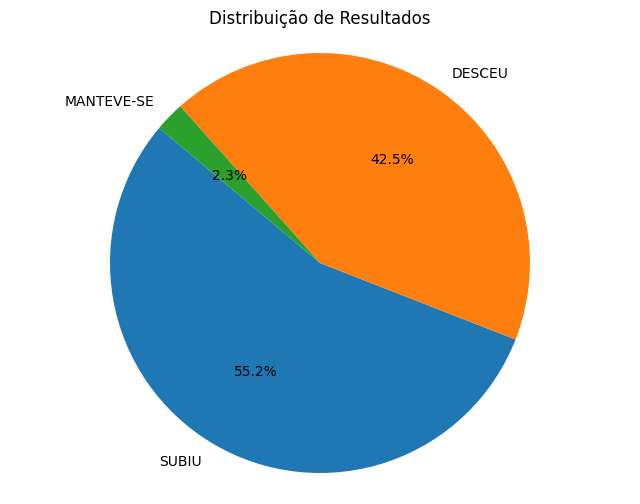

In [22]:
import matplotlib.pyplot as plt

# Suponha que você já tenha um DataFrame chamado df com as colunas Variacao_rs e Resultado

# Contar o número de ocorrências de cada categoria em 'Resultado'
resultado_counts = df_principal['Resultado'].value_counts()

# Criar um gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(resultado_counts, labels=resultado_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Resultados')
plt.axis('equal')  # Garante que o gráfico seja desenhado como um círculo

# Mostrar o gráfico
plt.show()

In [23]:
# Somente os valores de dos Tickers que subiram

df_principal_subiu = df_principal[df_principal['Resultado']=='SUBIU']
df_principal_subiu

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Empresa,Segmento,Anos_de_fundacao,Cat_Idade
0,USIM5,2024-01-26,9.50,5.20,0.05,9.03,515117391,241889725.43,SUBIU,Usiminas,Siderurgia,60,MAIS DE 50 ANOS
1,CMIN3,2024-01-26,6.82,2.40,0.02,6.66,1110559345,177515970.30,SUBIU,CSN Mineração,Mineração,8,NOVA
2,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,SUBIU,Petrobras,Petróleo,69,MAIS DE 50 ANOS
3,PETR3,2024-01-26,41.96,2.19,0.02,41.06,2379877655,2140059393.53,SUBIU,Petrobras,Petróleo,69,MAIS DE 50 ANOS
4,SUZB3,2024-01-26,52.91,2.04,0.02,51.85,683452836,722946282.71,SUBIU,Suzano,Papel e Celulose,94,MAIS DE 50 ANOS
5,CPFE3,2024-01-26,37.10,2.03,0.02,36.36,187732538,138573955.06,SUBIU,CPFL Energia,Energia,109,MAIS DE 100
6,PRIO3,2024-01-26,45.69,1.98,0.02,44.80,800010734,709687498.18,SUBIU,PetroRio,Petróleo,9,NOVA
7,PETR4,2024-01-26,39.96,1.73,0.02,39.28,4566445852,3103136291.22,SUBIU,Petrobras,Petróleo,69,MAIS DE 50 ANOS
8,PETR4,2024-01-26,39.96,1.73,0.02,39.28,4566445852,3103136291.22,SUBIU,Petrobras,Petróleo,69,MAIS DE 50 ANOS
9,VALE3,2024-01-26,69.50,1.66,0.02,68.37,4196924316,4762926995.25,SUBIU,Vale,Mineração,79,MAIS DE 50 ANOS


In [24]:
# Somente os valores de dos Tickers que desceram

df_principal_desceu = df_principal[df_principal['Resultado']=='DESCEU']
df_principal_desceu

,Ativo,Data,Valor_final,Var_dia_pct,Var_pct,Valor_inicial,Qtd_teorica,Variacao_rs,Resultado,Empresa,Segmento,Anos_de_fundacao,Cat_Idade
50,BBSE3,2024-01-26,33.73,-0.02,-0.00,33.74,671750768,-4532537.19,DESCEU,BB Seguridade,Seguros,11,NOVA
51,SBSP3,2024-01-26,77.04,-0.06,-0.00,77.09,340001799,-15725678.56,DESCEU,Sabesp,Saneamento,47,NOVA
52,TOTS3,2024-01-26,30.88,-0.06,-0.00,30.90,514122351,-9531377.75,DESCEU,Totvs,Tecnologia,55,MAIS DE 50 ANOS
53,CMIG4,2024-01-26,11.64,-0.17,-0.00,11.66,1437415777,-28492019.83,DESCEU,CEMIG,Energia,69,MAIS DE 50 ANOS
54,ELET6,2024-01-26,46.04,-0.19,-0.00,46.13,268544014,-23535874.33,DESCEU,Eletrobras,Energia,64,MAIS DE 50 ANOS
55,ELET6,2024-01-26,46.04,-0.19,-0.00,46.13,268544014,-23535874.33,DESCEU,Eletrobras,Energia,64,MAIS DE 50 ANOS
56,ENEV3,2024-01-26,12.87,-0.23,-0.00,12.90,1579130168,-46851590.76,DESCEU,Eneva,Energia,17,NOVA
57,WEGE3,2024-01-26,33.17,-0.24,-0.00,33.25,1481593024,-118230410.44,DESCEU,WEG,Automação,59,MAIS DE 50 ANOS
58,SLCE3,2024-01-26,19.30,-0.25,-0.00,19.35,195751130,-9468663.68,DESCEU,SLC Agrícola,Agronegócio,46,NOVA
59,ALOS3,2024-01-26,24.62,-0.28,-0.00,24.69,532616595,-36819552.34,DESCEU,ALOS3,Telecomunicações,9,NOVA


In [25]:
analise_subiu = df_principal_subiu.groupby('Segmento')['Variacao_rs'].sum().reset_index()
analise_subiu

,Segmento,Variacao_rs
0,Alimentos,407833683.09
1,Aviação,65452205.55
2,Banco,4636679965.25
3,Construção,37525872.38
4,Educação,72295838.99
5,Energia,1209821623.57
6,Holding,416092244.42
7,Imobiliário,18068446.61
8,Logística,233902674.79
9,Meios de Pagamento,43657683.38


### Analisando Saldo

In [26]:
analise_saldo = df_principal.groupby('Resultado')['Variacao_rs'].sum().reset_index()
analise_saldo

,Resultado,Variacao_rs
0,DESCEU,-6891816486.99
1,MANTEVE-SE,0.00
2,SUBIU,25858590641.35


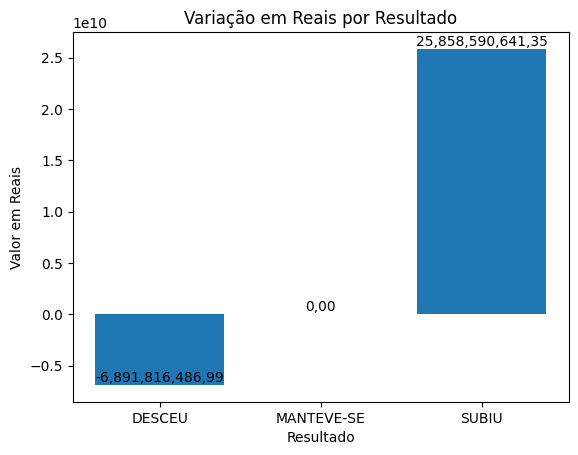

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar e calcular a soma da coluna 'Variacao_rs' por 'Resultado'
df_agrupado = df_principal.groupby('Resultado')['Variacao_rs'].sum().reset_index()

# Dados do gráfico
resultados = df_agrupado['Resultado']
valores = df_agrupado['Variacao_rs']

# Configurações do gráfico
plt.bar(resultados, valores)
plt.xlabel('Resultado')
plt.ylabel('Valor em Reais')
plt.title('Variação em Reais por Resultado')

# Adicionar os valores formatados nas barras
for i, v in enumerate(valores):
    plt.text(i, v, '{:,.2f}'.format(v).replace('.', ','), ha='center', va='bottom')

# Exibe o gráfico
plt.show()

## Gráfico por Faixa Etária

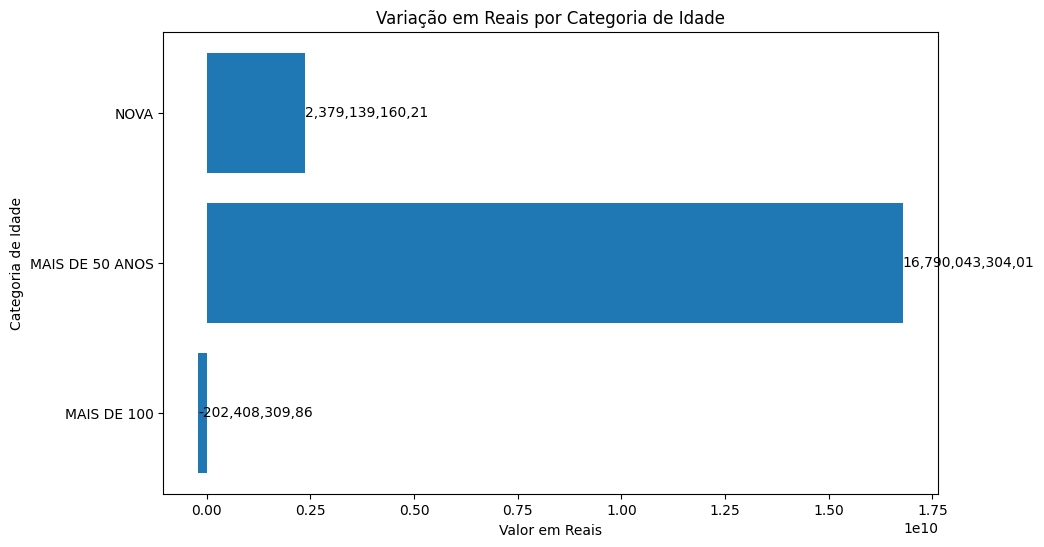

In [63]:
import matplotlib.pyplot as plt

# Agrupar os valores por Categoria de Idade
df_agrupado = df_principal.groupby('Cat_Idade')['Variacao_rs'].sum().reset_index()

# Dados do gráfico
categorias = df_agrupado['Cat_Idade']
valores = df_agrupado['Variacao_rs']

# Configurações do gráfico
fig, ax = plt.subplots(figsize=(10, 6))  # Definindo o tamanho da figura
ax.barh(categorias, valores)
ax.set_xlabel('Valor em Reais')
ax.set_ylabel('Categoria de Idade')
ax.set_title('Variação em Reais por Categoria de Idade')

# Adicionar os valores formatados nas barras
for i, v in enumerate(valores):
    ax.text(v, i, '{:,.2f}'.format(v).replace('.', ','), ha='left', va='center')

# Exibe o gráfico
plt.show()

### Quantidade por categoria

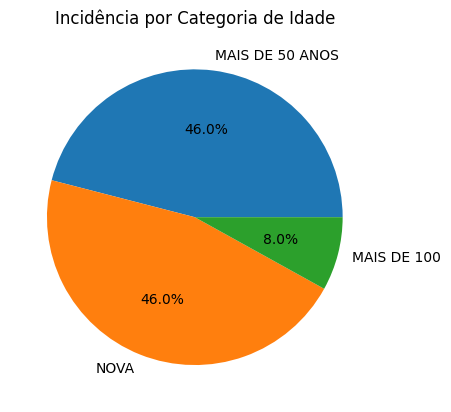

In [66]:
import matplotlib.pyplot as plt

# Contagem de incidências por categoria
contagem =df_principal['Cat_Idade'].value_counts()

# Categorias e valores correspondentes
categorias = contagem.index.tolist()
valores = contagem.values.tolist()

# Configurações do gráfico
plt.pie(valores, labels=categorias, autopct='%1.1f%%')
plt.title('Incidência por Categoria de Idade')

# Exibe o gráfico
plt.show()